In [1]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

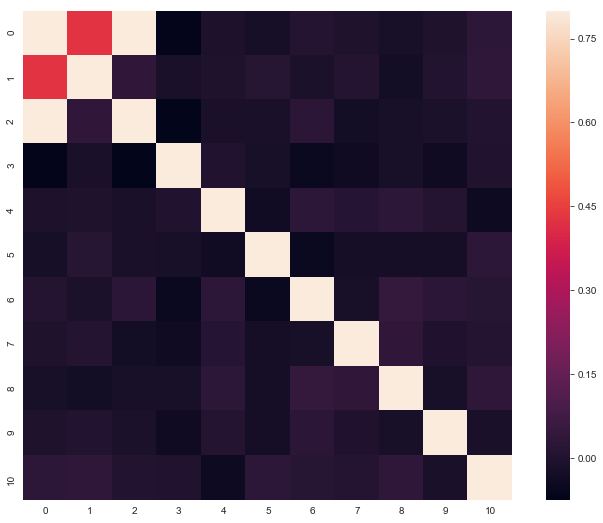

In [2]:
# Number of datapoints in outcome
n = 1000

# Number of features
p = 10

# Create random normally distributed data for parameters
X = np.random.normal(size =n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size = n * 1) + 5


# Check out the correlations. First column is the outcome
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

R-Squared Regression:  0.8453606251667861
R-Squared PLSR:        0.8453605487782457


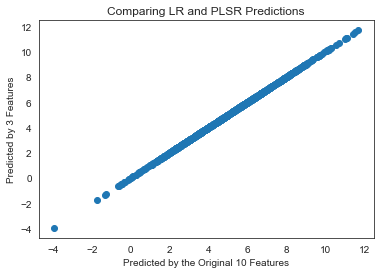

In [4]:
# Fit a linear model with all 10 features
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values
Y_pred = regr.predict(X)
print('R-Squared Regression: ', regr.score(X, y))

# Fit a linear model using PLSR. Reduce feature space to 3 dimensions
pls1 = PLSRegression(n_components = 3)

# Reduce X to R(X) and regress on y
pls1.fit(X, y)

# Save predicted values
Y_PLS_pred = pls1.predict(X)
print('R-Squared PLSR:       ', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by the Original 10 Features')
plt.ylabel('Predicted by 3 Features')
plt.title('Comparing LR and PLSR Predictions')
plt.show()

In [8]:
# Fit a linear model using PLSR. Test how different component quantities affect R-Squared
pls1 = PLSRegression(n_components = 1)
pls1.fit(X, y)
Y_PLS_pred = pls1.predict(X)

pls2 = PLSRegression(n_components = 2)
pls2.fit(X, y)
Y_PLS_pred = pls2.predict(X)

pls3 = PLSRegression(n_components = 3)
pls3.fit(X, y)
Y_PLS_pred = pls3.predict(X)

pls4 = PLSRegression(n_components = 4)
pls4.fit(X, y)
Y_PLS_pred = pls4.predict(X)

pls5 = PLSRegression(n_components = 5)
pls5.fit(X, y)
Y_PLS_pred = pls5.predict(X)

pls6 = PLSRegression(n_components = 6)
pls6.fit(X, y)
Y_PLS_pred = pls6.predict(X)

# Print results
print('R-Sq Reg:         ', regr.score(X, y))
print('')
print('R-Sq PLSR 1 Comp: ', pls1.score(X, y))
print('R-Sq PLSR 2 Comp: ', pls2.score(X, y))
print('R-Sq PLSR 3 Comp: ', pls3.score(X, y))
print('R-Sq PLSR 4 Comp: ', pls4.score(X, y))
print('R-Sq PLSR 5 Comp: ', pls5.score(X, y))
print('R-Sq PLSR 6 Comp: ', pls6.score(X, y))

R-Sq Reg:          0.8453606251667861

R-Sq PLSR 1 Comp:  0.8391444949546051
R-Sq PLSR 2 Comp:  0.8453286669651731
R-Sq PLSR 3 Comp:  0.8453605487782457
R-Sq PLSR 4 Comp:  0.8453606244013186
R-Sq PLSR 5 Comp:  0.8453606251660438
R-Sq PLSR 6 Comp:  0.8453606251667853
